In [208]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.image as mpi
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers, models, datasets
import os
from keras.wrappers.scikit_learn import KerasRegressor

In [209]:
#SE IMPORTA EL DATASET DEL CSV COMO UN DATAFRAME DE PANDAS
dataset = pd.read_csv('dataset.csv')
dataset.drop(dataset[dataset.type!='PHOTO'].index, inplace=True)
print(dataset.duplicated().sum())
dataset = dataset.drop_duplicates()
dataset
print(dataset.duplicated().sum())
dataset = dataset.set_index('cid')
dataset['id'] = dataset.index
dataset

47
0


,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,path,id
cid,,,,,,,,,,,,,,,
QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,SWAP.HIVE,PHOTO,2,False,30,2020,1,0,./dataset/image/QmegjZDN2gyD9A6cG4efj8DwbLLGTW...,QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH
QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,SWAP.HIVE,PHOTO,0,True,2,2021,1,0,./dataset/image/QmaifAjZTJd8jTxNrwSoGWmFpbPYcs...,QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4
QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,./dataset/image/QmUTicJApSyByFb7sgsNa6cz8MG5RK...,QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN
QmT36BPdeJWNEdUr566z4DYGWxXqrDSeoA7zCHbKw8528w,Dream World,I found colors in my sky,yoslehz,yoslehz_dream-world_i-found-colors-in-my-sky,20.0,SWAP.HIVE,PHOTO,0,False,2,2020,1,0,./dataset/image/QmT36BPdeJWNEdUr566z4DYGWxXqrD...,QmT36BPdeJWNEdUr566z4DYGWxXqrDSeoA7zCHbKw8528w
QmWQGXNu47pecHGfEatd3ATakphq5zXVrzs5unYYK4VR1c,experimental,Angela 👼,elias15g,elias15g_experimental_angela-,35.0,SWAP.HIVE,PHOTO,3,False,5,2020,1,0,./dataset/image/QmWQGXNu47pecHGfEatd3ATakphq5z...,QmWQGXNu47pecHGfEatd3ATakphq5zXVrzs5unYYK4VR1c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QmVp9RRbH89MGhJA9xMvDSwmwEVB7N2FFZwBxzZJHmXmVa,Leaf Art,Frontliners Leaf Art,sucal,sucal_leaf-art_frontliners-leaf-art,30.0,SWAP.HIVE,PHOTO,0,False,7,2020,3,0,./dataset/image/QmVp9RRbH89MGhJA9xMvDSwmwEVB7N...,QmVp9RRbH89MGhJA9xMvDSwmwEVB7N2FFZwBxzZJHmXmVa
Qmb4w4VqJWkWVGveh49cPixAfXNEASYTswVjso2HB7v4eU,:: NFT SERENITY ::,CRUISIN' TO THE MOON..,selectors,selectors_-nft-serenity-_cruisin-to-the-moon,10.0,SWAP.HIVE,PHOTO,0,False,3,2020,1,0,./dataset/image/Qmb4w4VqJWkWVGveh49cPixAfXNEAS...,Qmb4w4VqJWkWVGveh49cPixAfXNEASYTswVjso2HB7v4eU
QmTAfd3aMsHfdN5Rg1A3brK12LQDuVkPznZyW44eFRKvj4,Oil painting style pieces,Easy apocalypse,federacion45,federacion45_oil-painting-style-pieces_easy-ap...,60.0,SWAP.HIVE,PHOTO,0,False,2,2020,3,0,./dataset/image/QmTAfd3aMsHfdN5Rg1A3brK12LQDuV...,QmTAfd3aMsHfdN5Rg1A3brK12LQDuVkPznZyW44eFRKvj4


In [216]:
#SE IMPORTA EL DATASET DEL CSV COMO UN DATAFRAME DE PANDAS

lista = os.listdir('image')
list=[]
for x in lista:
    x = x.split('.')
    x = x[0]
    list.append(x)
for j in dataset['id']:
        print(j)
        if j not in list:
            dataset.drop(j, axis=0, inplace=True)
        print(len(dataset))

QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH
3012
QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4
3012
QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN
3012
QmT36BPdeJWNEdUr566z4DYGWxXqrDSeoA7zCHbKw8528w
3012
QmWQGXNu47pecHGfEatd3ATakphq5zXVrzs5unYYK4VR1c
3012
Qma6eHAWkXhrkHsfCHrYJNkuPoUAFrSjg2a6Xk2sCM7CBd
3012
QmeTAUBQUoqekVQBhEFqdCSAjCVX9ShTALx58w74mscf1a
3012
QmUmwLohsrgjHac27XQ7eWCkLS4VP35uUtT4jLqyo4rMyX
3012
QmWSozMKfzNE43WoAmcf5QdL3ptrmBTPJdxPxeggojeMdT
3012
QmfDRZnYUtM96U8AgNbS9bqgpahvPSDrXs2vhfsJKK1PD5
3012
QmSuqPZsf9xxcEkdDQpcNnJ5HZC3tacwsmPtmkrZ97LL8a
3012
QmbJ5uAYt3PDjEHZNoodeyjpPM7CPp93aTWT3SshbS5YFa
3012
QmaWvdqVZQeQXqSfR1HwPgWUUp1rfvDCQKvcc3gouhfbRm
3012
QmaDVBjsjmpPwHun3SCL9HGRjem5uZmoJgmCqdN13wVxrt
3012
QmNiRqeW84jnEbN8wVCcsyXc8f6HgX5aHEScBaTkqWmvpp
3012
QmeddHYx6UDmTRRLDdCYmzVK4VjRGQ1qNd2ooFzGPVbmFh
3012
QmQWykiSvoYKtTM1SznM4aDGNmciiRLEWNkCEoP2L8zR65
3012
QmaM1zTWoiYwT5L4BNcaaRnB56ueaiXLZpPWSKzJVQr2Pu
3012
QmU1kCAghsy5DCaWP79atdRzYDhvAYddFvVbuLPK4hAxUy
3012
QmQ9zjvq63yt

In [217]:
fotos = dataset.loc[dataset['type'] == 'PHOTO']
fotos = fotos.loc[fotos['year']>=2014]
#Cuantas imagenes
fotos.loc[fotos['id']=='Qma1SmtDeCDU9yqQe5VGTtx6Z5ncdXWAtN1LoP7eqEzWh8']['price']
fotos.drop(fotos[fotos['price']>350].index,inplace=True)

count    2658.000000
mean       77.958715
std        73.830445
min         2.500000
25%        25.000000
50%        50.000000
75%       100.000000
max       350.000000
Name: price, dtype: float64


array([ 15. ,  23. ,  30. ,  40. ,  50. ,  65. ,  90. , 121.8, 200. ,
       350. ])

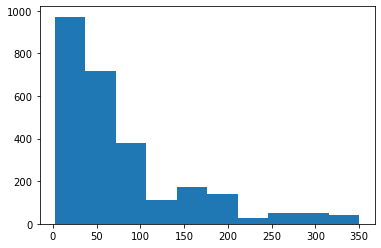

In [218]:
plt.hist(fotos['price'])
print(fotos['price'].describe())
np.percentile(fotos['price'],[10,20,30,40,50,60,70,80,90,100])

In [219]:
fotos['dec'] = fotos['price']
fotos

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,path,id,dec
cid,,,,,,,,,,,,,,,,
QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,SWAP.HIVE,PHOTO,2,False,30,2020,1,0,./dataset/image/QmegjZDN2gyD9A6cG4efj8DwbLLGTW...,QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH,50.0
QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,SWAP.HIVE,PHOTO,0,True,2,2021,1,0,./dataset/image/QmaifAjZTJd8jTxNrwSoGWmFpbPYcs...,QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4,10.0
QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,./dataset/image/QmUTicJApSyByFb7sgsNa6cz8MG5RK...,QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN,20.0
QmT36BPdeJWNEdUr566z4DYGWxXqrDSeoA7zCHbKw8528w,Dream World,I found colors in my sky,yoslehz,yoslehz_dream-world_i-found-colors-in-my-sky,20.0,SWAP.HIVE,PHOTO,0,False,2,2020,1,0,./dataset/image/QmT36BPdeJWNEdUr566z4DYGWxXqrD...,QmT36BPdeJWNEdUr566z4DYGWxXqrDSeoA7zCHbKw8528w,20.0
QmWQGXNu47pecHGfEatd3ATakphq5zXVrzs5unYYK4VR1c,experimental,Angela 👼,elias15g,elias15g_experimental_angela-,35.0,SWAP.HIVE,PHOTO,3,False,5,2020,1,0,./dataset/image/QmWQGXNu47pecHGfEatd3ATakphq5z...,QmWQGXNu47pecHGfEatd3ATakphq5zXVrzs5unYYK4VR1c,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QmVp9RRbH89MGhJA9xMvDSwmwEVB7N2FFZwBxzZJHmXmVa,Leaf Art,Frontliners Leaf Art,sucal,sucal_leaf-art_frontliners-leaf-art,30.0,SWAP.HIVE,PHOTO,0,False,7,2020,3,0,./dataset/image/QmVp9RRbH89MGhJA9xMvDSwmwEVB7N...,QmVp9RRbH89MGhJA9xMvDSwmwEVB7N2FFZwBxzZJHmXmVa,30.0
Qmb4w4VqJWkWVGveh49cPixAfXNEASYTswVjso2HB7v4eU,:: NFT SERENITY ::,CRUISIN' TO THE MOON..,selectors,selectors_-nft-serenity-_cruisin-to-the-moon,10.0,SWAP.HIVE,PHOTO,0,False,3,2020,1,0,./dataset/image/Qmb4w4VqJWkWVGveh49cPixAfXNEAS...,Qmb4w4VqJWkWVGveh49cPixAfXNEASYTswVjso2HB7v4eU,10.0
QmTAfd3aMsHfdN5Rg1A3brK12LQDuVkPznZyW44eFRKvj4,Oil painting style pieces,Easy apocalypse,federacion45,federacion45_oil-painting-style-pieces_easy-ap...,60.0,SWAP.HIVE,PHOTO,0,False,2,2020,3,0,./dataset/image/QmTAfd3aMsHfdN5Rg1A3brK12LQDuV...,QmTAfd3aMsHfdN5Rg1A3brK12LQDuVkPznZyW44eFRKvj4,60.0


In [220]:
#Ultimo decil
flc=fotos.loc[:,'price']<=350
fotos['dec'].loc[flc]=9
fotos

#Noveno decil
flc=fotos.loc[:,'price']<=200
fotos['dec'].loc[flc]=8
fotos

#Octavo decil
flc=fotos.loc[:,'price']<=121.8
fotos['dec'].loc[flc]=7
fotos

#Septimo decil
flc=fotos.loc[:,'price']<=90
fotos['dec'].loc[flc]=6
fotos

#Sexto decil
flc=fotos.loc[:,'price']<=65
fotos['dec'].loc[flc]=5
fotos

#Quinto decil
flc=fotos.loc[:,'price']<=50
fotos['dec'].loc[flc]=4
fotos

#Cuarto decil
flc=fotos.loc[:,'price']<=40
fotos['dec'].loc[flc]=3
fotos

#Tercer decil
flc=fotos.loc[:,'price']<=30
fotos['dec'].loc[flc]=2
fotos

#Segundo decil
flc=fotos.loc[:,'price']<=23
fotos['dec'].loc[flc]=1
fotos

#Primer decil
flc=fotos.loc[:,'price']<=30
fotos['dec'].loc[flc]=0
fotos

C:\Users\hp\AppData\Local\Temp\ipykernel_24392\2502673025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fotos['dec'].loc[flc]=9
C:\Users\hp\AppData\Local\Temp\ipykernel_24392\2502673025.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fotos['dec'].loc[flc]=8
C:\Users\hp\AppData\Local\Temp\ipykernel_24392\2502673025.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fotos['dec'].loc[flc]=7
C:\Users\hp\AppData\Local\Temp\ipyke

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,path,id,dec
cid,,,,,,,,,,,,,,,,
QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,SWAP.HIVE,PHOTO,2,False,30,2020,1,0,./dataset/image/QmegjZDN2gyD9A6cG4efj8DwbLLGTW...,QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH,4.0
QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,SWAP.HIVE,PHOTO,0,True,2,2021,1,0,./dataset/image/QmaifAjZTJd8jTxNrwSoGWmFpbPYcs...,QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4,0.0
QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,./dataset/image/QmUTicJApSyByFb7sgsNa6cz8MG5RK...,QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN,0.0
QmT36BPdeJWNEdUr566z4DYGWxXqrDSeoA7zCHbKw8528w,Dream World,I found colors in my sky,yoslehz,yoslehz_dream-world_i-found-colors-in-my-sky,20.0,SWAP.HIVE,PHOTO,0,False,2,2020,1,0,./dataset/image/QmT36BPdeJWNEdUr566z4DYGWxXqrD...,QmT36BPdeJWNEdUr566z4DYGWxXqrDSeoA7zCHbKw8528w,0.0
QmWQGXNu47pecHGfEatd3ATakphq5zXVrzs5unYYK4VR1c,experimental,Angela 👼,elias15g,elias15g_experimental_angela-,35.0,SWAP.HIVE,PHOTO,3,False,5,2020,1,0,./dataset/image/QmWQGXNu47pecHGfEatd3ATakphq5z...,QmWQGXNu47pecHGfEatd3ATakphq5zXVrzs5unYYK4VR1c,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QmVp9RRbH89MGhJA9xMvDSwmwEVB7N2FFZwBxzZJHmXmVa,Leaf Art,Frontliners Leaf Art,sucal,sucal_leaf-art_frontliners-leaf-art,30.0,SWAP.HIVE,PHOTO,0,False,7,2020,3,0,./dataset/image/QmVp9RRbH89MGhJA9xMvDSwmwEVB7N...,QmVp9RRbH89MGhJA9xMvDSwmwEVB7N2FFZwBxzZJHmXmVa,0.0
Qmb4w4VqJWkWVGveh49cPixAfXNEASYTswVjso2HB7v4eU,:: NFT SERENITY ::,CRUISIN' TO THE MOON..,selectors,selectors_-nft-serenity-_cruisin-to-the-moon,10.0,SWAP.HIVE,PHOTO,0,False,3,2020,1,0,./dataset/image/Qmb4w4VqJWkWVGveh49cPixAfXNEAS...,Qmb4w4VqJWkWVGveh49cPixAfXNEASYTswVjso2HB7v4eU,0.0
QmTAfd3aMsHfdN5Rg1A3brK12LQDuVkPznZyW44eFRKvj4,Oil painting style pieces,Easy apocalypse,federacion45,federacion45_oil-painting-style-pieces_easy-ap...,60.0,SWAP.HIVE,PHOTO,0,False,2,2020,3,0,./dataset/image/QmTAfd3aMsHfdN5Rg1A3brK12LQDuV...,QmTAfd3aMsHfdN5Rg1A3brK12LQDuVkPznZyW44eFRKvj4,5.0


In [221]:
fotos_train, fotos_test= train_test_split(fotos,  test_size=.3,  random_state=500)
fotos_train

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,path,id,dec
cid,,,,,,,,,,,,,,,,
QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp5UYZ8rGLAQwakctq,Physical Gallery,Torn Between Red and Blue,tych021,tych021_physical-gallery_torn-between-red-and-...,35.0,SWAP.HIVE,PHOTO,2,False,5,2021,1,0,./dataset/image/QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp...,QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp5UYZ8rGLAQwakctq,3.0
QmNazUDbRovKyr7aHVC5YnQXE1K6XE8Civm9Qp22HBD9Dh,painting,Sovereignty,viralnft,viralnft_painting_sovereignty,100.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,./dataset/image/QmNazUDbRovKyr7aHVC5YnQXE1K6XE...,QmNazUDbRovKyr7aHVC5YnQXE1K6XE8Civm9Qp22HBD9Dh,7.0
QmeJbXg1fRY69WKzMbYxH6j78GzbFuqjR8KVKn7Wf5adfo,Sketching in a sketchbook. parrot,Sketching in a sketchbook. parrot,elenasteem,elenasteem_sketching-in-a-sketchbook-parrot_sk...,40.0,SWAP.HIVE,PHOTO,0,False,2,2019,1,0,./dataset/image/QmeJbXg1fRY69WKzMbYxH6j78GzbFu...,QmeJbXg1fRY69WKzMbYxH6j78GzbFuqjR8KVKn7Wf5adfo,3.0
QmZtdkhheBVfH8dSdkrgcktTVaQDPm9kP79ExjZdgkbxBT,Sexy pig,Sexy pig,yakubenko,yakubenko_sexy-pig_sexy-pig,70.0,SWAP.HIVE,PHOTO,1,False,1,2018,1,0,./dataset/image/QmZtdkhheBVfH8dSdkrgcktTVaQDPm...,QmZtdkhheBVfH8dSdkrgcktTVaQDPm9kP79ExjZdgkbxBT,6.0
QmVSfddBP38Uxsm36PtTpGd4reWFFgqWg2FYVRzdPeBvoV,Poetic paths,Adrenaline,rodrigocairo,rodrigocairo_poetic-paths_adrenaline,10.0,SWAP.HIVE,PHOTO,1,False,5,2021,1,0,./dataset/image/QmVSfddBP38Uxsm36PtTpGd4reWFFg...,QmVSfddBP38Uxsm36PtTpGd4reWFFgqWg2FYVRzdPeBvoV,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QmeMx1dZvyYQtYezDHRVzPSArCfBfn35QowEf1ZYXwdqzs,80's childhood,Young J,ibentmywookiee,ibentmywookiee_80s-childhood_young-j,260.0,SWAP.HIVE,PHOTO,0,False,1,2021,1,0,./dataset/image/QmeMx1dZvyYQtYezDHRVzPSArCfBfn...,QmeMx1dZvyYQtYezDHRVzPSArCfBfn35QowEf1ZYXwdqzs,9.0
QmYHu7WWN5KZTDCqyunTzsVuMKnhjgLzxwyQBytifcSZfC,Dragon shadow,Dragon shadow,pollyfoxxy,pollyfoxxy_dragon-shadow_dragon-shadow,24.0,SWAP.HIVE,PHOTO,0,False,5,2019,1,0,./dataset/image/QmYHu7WWN5KZTDCqyunTzsVuMKnhjg...,QmYHu7WWN5KZTDCqyunTzsVuMKnhjgLzxwyQBytifcSZfC,0.0
QmNpUMFwzMJod2Nnsg6skGcm7e8LBU2Sh3FgidPBGNGtCG,Recovered Art,Almost Abstract,bflanagin,bflanagin_recovered-art_almost-abstract,4.0,SWAP.HIVE,PHOTO,0,True,35,2015,1,0,./dataset/image/QmNpUMFwzMJod2Nnsg6skGcm7e8LBU...,QmNpUMFwzMJod2Nnsg6skGcm7e8LBU2Sh3FgidPBGNGtCG,0.0


In [222]:
#FUNCIÓN PARA CONVERTIR RGBA A RGB PARA FORMATOS DE PNG
def load_image_into_numpy_array(image):
    # The function supports only grayscale images
    last_axis = -1
    dim_to_repeat = 2
    repeats = 3
    grscale_img_3dims = np.expand_dims(image, last_axis)
    training_image = np.repeat(grscale_img_3dims, repeats, dim_to_repeat).astype('uint8')
    assert len(training_image.shape) == 3
    assert training_image.shape[-1] == 3
    return training_image

In [223]:
fotos_train['id'] = fotos_train.index
fotos_train

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,path,id,dec
cid,,,,,,,,,,,,,,,,
QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp5UYZ8rGLAQwakctq,Physical Gallery,Torn Between Red and Blue,tych021,tych021_physical-gallery_torn-between-red-and-...,35.0,SWAP.HIVE,PHOTO,2,False,5,2021,1,0,./dataset/image/QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp...,QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp5UYZ8rGLAQwakctq,3.0
QmNazUDbRovKyr7aHVC5YnQXE1K6XE8Civm9Qp22HBD9Dh,painting,Sovereignty,viralnft,viralnft_painting_sovereignty,100.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,./dataset/image/QmNazUDbRovKyr7aHVC5YnQXE1K6XE...,QmNazUDbRovKyr7aHVC5YnQXE1K6XE8Civm9Qp22HBD9Dh,7.0
QmeJbXg1fRY69WKzMbYxH6j78GzbFuqjR8KVKn7Wf5adfo,Sketching in a sketchbook. parrot,Sketching in a sketchbook. parrot,elenasteem,elenasteem_sketching-in-a-sketchbook-parrot_sk...,40.0,SWAP.HIVE,PHOTO,0,False,2,2019,1,0,./dataset/image/QmeJbXg1fRY69WKzMbYxH6j78GzbFu...,QmeJbXg1fRY69WKzMbYxH6j78GzbFuqjR8KVKn7Wf5adfo,3.0
QmZtdkhheBVfH8dSdkrgcktTVaQDPm9kP79ExjZdgkbxBT,Sexy pig,Sexy pig,yakubenko,yakubenko_sexy-pig_sexy-pig,70.0,SWAP.HIVE,PHOTO,1,False,1,2018,1,0,./dataset/image/QmZtdkhheBVfH8dSdkrgcktTVaQDPm...,QmZtdkhheBVfH8dSdkrgcktTVaQDPm9kP79ExjZdgkbxBT,6.0
QmVSfddBP38Uxsm36PtTpGd4reWFFgqWg2FYVRzdPeBvoV,Poetic paths,Adrenaline,rodrigocairo,rodrigocairo_poetic-paths_adrenaline,10.0,SWAP.HIVE,PHOTO,1,False,5,2021,1,0,./dataset/image/QmVSfddBP38Uxsm36PtTpGd4reWFFg...,QmVSfddBP38Uxsm36PtTpGd4reWFFgqWg2FYVRzdPeBvoV,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QmeMx1dZvyYQtYezDHRVzPSArCfBfn35QowEf1ZYXwdqzs,80's childhood,Young J,ibentmywookiee,ibentmywookiee_80s-childhood_young-j,260.0,SWAP.HIVE,PHOTO,0,False,1,2021,1,0,./dataset/image/QmeMx1dZvyYQtYezDHRVzPSArCfBfn...,QmeMx1dZvyYQtYezDHRVzPSArCfBfn35QowEf1ZYXwdqzs,9.0
QmYHu7WWN5KZTDCqyunTzsVuMKnhjgLzxwyQBytifcSZfC,Dragon shadow,Dragon shadow,pollyfoxxy,pollyfoxxy_dragon-shadow_dragon-shadow,24.0,SWAP.HIVE,PHOTO,0,False,5,2019,1,0,./dataset/image/QmYHu7WWN5KZTDCqyunTzsVuMKnhjg...,QmYHu7WWN5KZTDCqyunTzsVuMKnhjgLzxwyQBytifcSZfC,0.0
QmNpUMFwzMJod2Nnsg6skGcm7e8LBU2Sh3FgidPBGNGtCG,Recovered Art,Almost Abstract,bflanagin,bflanagin_recovered-art_almost-abstract,4.0,SWAP.HIVE,PHOTO,0,True,35,2015,1,0,./dataset/image/QmNpUMFwzMJod2Nnsg6skGcm7e8LBU...,QmNpUMFwzMJod2Nnsg6skGcm7e8LBU2Sh3FgidPBGNGtCG,0.0


In [224]:
fotos_test['id'] = fotos_test.index
fotos_test

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,path,id,dec
cid,,,,,,,,,,,,,,,,
QmcuCtKcYZaUP7ks8F2B2bui5bcS44X5pUoEYfE2Sda71C,Glitch,Walk of the Elephants,freakjesus,freakjesus_glitch_walk-of-the-elephants,160.0,SWAP.HIVE,PHOTO,0,False,1,2021,3,0,./dataset/image/QmcuCtKcYZaUP7ks8F2B2bui5bcS44...,QmcuCtKcYZaUP7ks8F2B2bui5bcS44X5pUoEYfE2Sda71C,8.0
QmaRX1Wy6YMtB7hBLCXmebCKi1sCn2MeNYw6zUzKcjou71,Crypto,LITECOIN L.A. CRYPTOART NFT 4,vikisecrets,vikisecrets_crypto_litecoin-la-cryptoart-nft-4,39.0,SWAP.HIVE,PHOTO,0,False,4,2020,3,0,./dataset/image/QmaRX1Wy6YMtB7hBLCXmebCKi1sCn2...,QmaRX1Wy6YMtB7hBLCXmebCKi1sCn2MeNYw6zUzKcjou71,3.0
QmSxVizLwKWonH76veDceaSQYFZSdQkvNHQKgk99piKGq6,Creepy,Happy Autopsy,shirahoshi,shirahoshi_creepy_happy-autopsy,30.0,SWAP.HIVE,PHOTO,0,False,4,2020,3,0,./dataset/image/QmSxVizLwKWonH76veDceaSQYFZSdQ...,QmSxVizLwKWonH76veDceaSQYFZSdQkvNHQKgk99piKGq6,0.0
QmUzgbufmcvo6GiFLKSfPnhJo9uYfk2C5u99JAdhYkjc6v,Nightmare Heroes,Nightmare Hero #2,sarahstudio,sarahstudio_nightmare-heroes_nightmare-hero-2,55.0,SWAP.HIVE,PHOTO,0,False,5,2021,1,0,./dataset/image/QmUzgbufmcvo6GiFLKSfPnhJo9uYfk...,QmUzgbufmcvo6GiFLKSfPnhJo9uYfk2C5u99JAdhYkjc6v,5.0
QmWArDNV9y49QPd37JRfLM9A6Ks6JANH9vVEZ4b8kiyruq,The fish that ate the world,the fish that ate the world,artxmike,artxmike_the-fish-that-ate-the-world_the-fish-...,45.0,SWAP.HIVE,PHOTO,1,False,5,2020,1,0,./dataset/image/QmWArDNV9y49QPd37JRfLM9A6Ks6JA...,QmWArDNV9y49QPd37JRfLM9A6Ks6JANH9vVEZ4b8kiyruq,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QmQure5JCR6Jquvrcf44tESDkBVaiUG8B267MNryZXTT68,People with Jonathan,Reign-bow Eyes,jonamccallum,jonamccallum_people-with-jonathan_reign-bow-eyes,25.0,SWAP.HIVE,PHOTO,1,False,3,2021,1,0,./dataset/image/QmQure5JCR6Jquvrcf44tESDkBVaiU...,QmQure5JCR6Jquvrcf44tESDkBVaiUG8B267MNryZXTT68,0.0
QmdncRN6L8NJNwHEnm1UxbfByz1pmzqu9KqKoFrP578h2U,Hivelander The Immortal Mannequin,Mannefish's dream,hivelander,hivelander_hivelander-the-immortal-mannequin_m...,108.0,SWAP.HIVE,PHOTO,0,False,1,2020,1,0,./dataset/image/QmdncRN6L8NJNwHEnm1UxbfByz1pmz...,QmdncRN6L8NJNwHEnm1UxbfByz1pmzqu9KqKoFrP578h2U,7.0
QmYZjgNBcWnCUv89CpsAekS3CPxRqq66hJyKidgZcEar8e,REKT,PixeLincoln,rektdoteth,rektdoteth_rekt_pixelincoln,30.0,SWAP.HIVE,PHOTO,0,False,1,2020,1,0,./dataset/image/QmYZjgNBcWnCUv89CpsAekS3CPxRqq...,QmYZjgNBcWnCUv89CpsAekS3CPxRqq66hJyKidgZcEar8e,0.0


In [225]:
# SE AGREGAN TODAS LAS IMAGENES DE LA CARPETA 'image' COMO ARREGLOS DE NUMPY A UNA LISTA DE PYTHON PARA EL TEST
imagenesnpTE= []
marcasTE=[]
#id=[]
for i in fotos_test.index:
    #print(i)
    try:
        imagen = mpi.imread('image/'+i+'.png')
        if len(imagen.shape)==3:
            imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.png'), channels=3)
            imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
            imagennp = imagen.numpy()
            imagenesnpTE.append(imagennp)
            marcasTE.append(fotos_test.loc[fotos['id'] == i]['dec'])
        else:
            imagen = load_image_into_numpy_array(imagen)
            imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
            imagennp = imagen.numpy()
            imagenesnpTE.append(imagennp)
            marcasTE.append(fotos_test.loc[fotos['id'] == i]['dec'])
    except:
        try:
            imagen = mpi.imread('image/'+i+'.jpg')
            if len(imagen.shape)==3:
                imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.jpg'), channels=3)
                imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                imagennp = imagen.numpy()
                imagenesnpTE.append(imagennp)
                marcasTE.append(fotos_test.loc[fotos['id'] == i]['dec'])
            else:
                imagen = load_image_into_numpy_array(imagen)
                imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                imagennp = imagen.numpy()
                imagenesnpTE.append(imagennp)
                marcasTE.append(fotos_test.loc[fotos['id'] == i]['dec'])
        except:
            #try:
                imagen = mpi.imread('image/'+i+'.jpeg')
                if len(imagen.shape)==3:
                    imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.jpeg'), channels=3)
                    imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                    imagennp = imagen.numpy()
                    imagenesnpTE.append(imagennp)
                    marcasTE.append(fotos_test.loc[fotos['id'] == i]['dec'])
                else:
                    imagen = load_image_into_numpy_array(imagen)
                    imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                    imagennp = imagen.numpy()
                    imagenesnpTE.append(imagennp)
                    marcasTE.append(fotos_test.loc[fotos['id'] == i]['dec'])
            #except:
            #    fotos.drop(i, axis=0, inplace = True)
            #    print(i)
print(len(imagenesnpTE))
print(len(marcasTE))

c:\Users\hp\miniconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\hp\miniconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (125889673 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


798
798


In [226]:
# SE AGREGAN TODAS LAS IMAGENES DE LA CARPETA 'image' COMO ARREGLOS DE NUMPY A UNA LISTA DE PYTHON PARA EL TEST
imagenesnpTR = []
marcasTR=[]
#id=[]
for i in fotos_train.index:
    #print(i)
    try:
        imagen = mpi.imread('image/'+i+'.png')
        if len(imagen.shape)==3:
            imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.png'), channels=3)
            imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
            imagennp = imagen.numpy()
            imagenesnpTR.append(imagennp)
            marcasTR.append(fotos_train.loc[fotos['id'] == i]['dec'])
        else:
            imagen = load_image_into_numpy_array(imagen)
            imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
            imagennp = imagen.numpy()
            imagenesnpTR.append(imagennp)
            marcasTR.append(fotos_train.loc[fotos['id'] == i]['dec'])
    except:
        try:
            imagen = mpi.imread('image/'+i+'.jpg')
            if len(imagen.shape)==3:
                imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.jpg'), channels=3)
                imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                imagennp = imagen.numpy()
                imagenesnpTR.append(imagennp)
                marcasTR.append(fotos_train.loc[fotos['id'] == i]['dec'])
            else:
                imagen = load_image_into_numpy_array(imagen)
                imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                imagennp = imagen.numpy()
                imagenesnpTR.append(imagennp)
                marcasTR.append(fotos_train.loc[fotos['id'] == i]['dec'])
        except:
            #try:
                imagen = mpi.imread('image/'+i+'.jpeg')
                if len(imagen.shape)==3:
                    imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.jpeg'), channels=3)
                    imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                    imagennp = imagen.numpy()
                    imagenesnpTR.append(imagennp)
                    marcasTR.append(fotos_train.loc[fotos['id'] == i]['dec'])
                else:
                    imagen = load_image_into_numpy_array(imagen)
                    imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                    imagennp = imagen.numpy()
                    imagenesnpTR.append(imagennp)
                    marcasTR.append(fotos_train.loc[fotos['id'] == i]['dec'])
            #except:
            #    fotos.drop(i, axis=0, inplace = True)
            #    print(i)
print(len(imagenesnpTR))
print(len(marcasTR))

c:\Users\hp\miniconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\hp\miniconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (133330000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\hp\miniconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (126742564 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\hp\miniconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (90552309 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1860
1860


In [227]:
print(len(imagenesnpTR))
print(len(imagenesnpTE))
print(len(marcasTE))
print(len(marcasTR))

1860
798
798
1860


In [228]:
def removearray(L,arr):
    ind = 0
    size = len(L)
    while ind != size and not np.array_equal(L[ind],arr):
        ind += 1
    if ind != size:
        L.pop(ind)
    else:
        raise ValueError('array not found in list.')

In [229]:
#CONVERTIMOS TODOS LOS NUMPY ARRAYS EN TENSORS PARA USAR LA LIBRERIA TENSORFLOW
for i in range(0,len(imagenesnpTR)-1):
    x = tf.convert_to_tensor(imagenesnpTR[i], dtype=tf.int32)
    imagenesnpTR[i] = x

for i in range(0,len(imagenesnpTE)-1):
    x = tf.convert_to_tensor(imagenesnpTE[i], dtype=tf.int32)
    imagenesnpTE[i] = x

count    7.970000e+02
mean     4.946441e+06
std      3.582229e+06
min      4.158740e+05
25%      2.428324e+06
50%      4.049505e+06
75%      6.441346e+06
max      2.488453e+07
dtype: float64
(array([253., 270., 145.,  63.,  34.,  11.,  13.,   5.,   1.,   2.]), array([  415874. ,  2862739.9,  5309605.8,  7756471.7, 10203337.6,
       12650203.5, 15097069.4, 17543935.3, 19990801.2, 22437667.1,
       24884533. ]), <BarContainer object of 10 artists>)
count    1.859000e+03
mean     5.099218e+06
std      3.555408e+06
min      2.253570e+05
25%      2.506486e+06
50%      4.116901e+06
75%      6.749206e+06
max      2.740466e+07
dtype: float64


(array([601., 617., 348., 173.,  65.,  32.,  13.,   7.,   1.,   2.]),
 array([  225357. ,  2943287.7,  5661218.4,  8379149.1, 11097079.8,
        13815010.5, 16532941.2, 19250871.9, 21968802.6, 24686733.3,
        27404664. ]),
 <BarContainer object of 10 artists>)

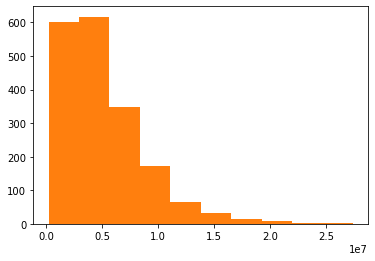

In [264]:
#OBTENEMOS LA VARIANZA DE CADA IMAGEN Y LA GUARDAMOS EN UAN LISTA PARA CONVERTIRLA EN UNA SERIE DE PANDAS
varTE=[]
for i in range(0,len(imagenesnpTE)-1):
    varimgTE = tf.image.total_variation(imagenesnpTE[i])
    SVARTE = varimgTE.numpy()
    aTE = float(SVARTE)
    varTE.append(aTE)

SVARTE = pd.Series(varTE)
print(SVARTE.describe())
print(plt.hist(SVARTE))

varTR=[]
for i in range(0,len(imagenesnpTR)-1):
    varimgTR = tf.image.total_variation(imagenesnpTR[i])
    SVARTR = varimgTR.numpy()
    aTR = float(SVARTR)
    varTR.append(aTR)

SVARTR = pd.Series(varTR)
print(SVARTR.describe())
plt.hist(SVARTR)

In [231]:
#VERIFICAMOS QUE TODAS LAS IMÁGENES HAYAN QUEDADO EN LA MISMA RESOLUCIÖN Y CON LOS MISMOS CANALES
x=0
for i in imagenesnpTR:
    row,col,cha = i.shape
    if row!=256 or col!=256 or cha !=3:
        print(i.shape)
        print(x)
        x+=1

z=0
for i in imagenesnpTE:
    row,col,cha = i.shape
    if row!=256 or col!=256 or cha !=3:
        print(i.shape)
        print(z)
        z+=1

print(x)
print(z)

0
0


In [232]:
ARRAYTE = np.array(imagenesnpTE)
ARRAYTR = np.array(imagenesnpTR)

cid
QmezXmo44DsGsA5MrCbtywNdpbXAiw92LT3vHGok2r2Whu    8.0
Name: dec, dtype: float64


title                                             They judge me
name                                              They judge me
creator                                          enzo.ricciardi
art_series           enzo.ricciardi_they-judge-me_they-judge-me
price                                                     200.0
symbol                                                SWAP.HIVE
type                                                      PHOTO
likes                                                         1
nsfw                                                      False
tokens                                                        3
year                                                       2021
rights                                                        3
royalty                                                       0
path          ./dataset/image/QmezXmo44DsGsA5MrCbtywNdpbXAiw...
id               QmezXmo44DsGsA5MrCbtywNdpbXAiw92LT3vHGok2r2Whu
dec                                     

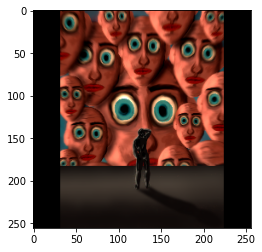

In [233]:
plt.imshow(ARRAYTE[200])
print(marcasTE[200])
fotos_test.iloc[200]

In [238]:
#Estandarizar los datos
ARRAYTE_est =ARRAYTE/255
ARRAYTR_est =ARRAYTR/255

In [239]:
marcasTE_est=np.asarray(marcasTE)
#marcasTE_est=marcasTE_est/350
marcasTR_est=np.asarray(marcasTR)
#marcasTR_est=marcasTR_est/350

In [240]:
#Flatten
marcasTR_est2 = np.reshape(marcasTR_est,-1) #Se convierte Y en un vector de 1 dimensión
marcasTE_est2 = np.reshape(marcasTE_est,-1)

old_shapeTE = ARRAYTE_est.shape
old_shapeTR = ARRAYTR_est.shape
new_shapeTE = old_shapeTE[1] * old_shapeTE[2] * old_shapeTE[3]
new_shapeTR = old_shapeTR[1] * old_shapeTR[2] * old_shapeTR[3]

ARRAYTE_estn=ARRAYTE_est.reshape(old_shapeTE[0], new_shapeTE)
ARRAYTR_estn=ARRAYTR_est.reshape(old_shapeTR[0],new_shapeTR)

In [262]:
from sklearn import linear_model
def accu(predictions, targets):
    return np.equal(predictions, targets).sum()/798

a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in a:
    clf=linear_model.Lasso(alpha=i, max_iter=250) #Se define cls como un modelo logistico con semilla=911}
    clf.fit(ARRAYTR_estn,marcasTR_est2) #Se ajusta el modelo utilizando las caracteristicas contenidas en X, x1 y x2,

    #Evaluacion
    marcas_hat=clf.predict(ARRAYTE_estn)
    marcas_hat = (marcas_hat + 0.49) // 1
    print(i)
    print(accu(marcas_hat,marcasTE_est2))

0.1
0.14536340852130325
0.2
0.14536340852130325
0.3
0.14536340852130325
0.4
0.14536340852130325
0.5
0.14536340852130325
0.6
0.14536340852130325
0.7
0.14536340852130325
0.8
0.14536340852130325
0.9
0.14536340852130325
1
0.14536340852130325


In [136]:
len(np.unique(marcasTR_est))

8

In [204]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(250,250, 3), kernel_initializer= 'he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D((3,3)))

model.add(layers.Conv2D(32, (3,3), activation='relu',kernel_initializer= 'he_normal'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3,3)))

model.add(layers.Conv2D(64, (3,3), activation='relu',kernel_initializer= 'he_normal'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3,3)))

model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer= 'he_normal'))
model.add(layers.BatchNormalization())
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_187 (Conv2D)         (None, 31, 31, 32)        416       
                                                                 
 max_pooling2d_148 (MaxPooli  (None, 15, 15, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_188 (Conv2D)         (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_149 (MaxPooli  (None, 7, 7, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_189 (Conv2D)         (None, 6, 6, 128)         32896     
                                                                 
 max_pooling2d_150 (MaxPooli  (None, 6, 6, 128)      

In [205]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_initializer= 'he_normal'))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer= 'he_normal'))
model.summary()
model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
          metrics=['accuracy'])

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_187 (Conv2D)         (None, 31, 31, 32)        416       
                                                                 
 max_pooling2d_148 (MaxPooli  (None, 15, 15, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_188 (Conv2D)         (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_149 (MaxPooli  (None, 7, 7, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_189 (Conv2D)         (None, 6, 6, 128)         32896     
                                                                 
 max_pooling2d_150 (MaxPooli  (None, 6, 6, 128)      

In [206]:
history = model.fit(ARRAYTR_est, marcasTR_est, epochs=20, 
                    validation_data=(ARRAYTE_est, marcasTE_est))

Epoch 1/5
59/59 [==============================] - 17s 272ms/step - loss: 9.5408 - accuracy: 0.3290 - val_loss: 10.0449 - val_accuracy: 0.3246
Epoch 2/5
59/59 [==============================] - 15s 255ms/step - loss: 9.9654 - accuracy: 0.3312 - val_loss: 10.0449 - val_accuracy: 0.3246
Epoch 3/5
59/59 [==============================] - 14s 230ms/step - loss: 9.9654 - accuracy: 0.3312 - val_loss: 10.0449 - val_accuracy: 0.3246
Epoch 4/5
59/59 [==============================] - 13s 216ms/step - loss: 9.9654 - accuracy: 0.3312 - val_loss: 10.0449 - val_accuracy: 0.3246
Epoch 5/5
59/59 [==============================] - 11s 192ms/step - loss: 9.9654 - accuracy: 0.3312 - val_loss: 10.0449 - val_accuracy: 0.3246


25/25 - 1s - loss: 10.0449 - accuracy: 0.3246 - 510ms/epoch - 20ms/step


0.3245614171028137

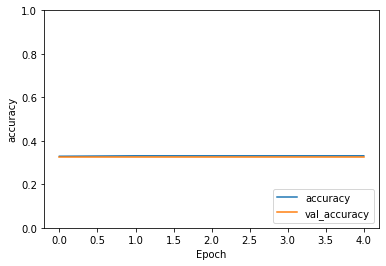

In [207]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(ARRAYTE_est,  marcasTE_est, verbose=2)
test_acc